In [4]:
import pandas as pd
import numpy as np

In [5]:
arbutusObsRaw = pd.read_csv("ArbutusObsevations.csv", sep = "\t")

C:\Users\Sean Haight\AppData\Local\Temp\ipykernel_4632\2947188566.py:1: DtypeWarning: Columns (10,39,46) have mixed types. Specify dtype option on import or set low_memory=False.
  arbutusObsRaw = pd.read_csv("ArbutusObsevations.csv", sep = "\t")


In [6]:
arbutusObs = arbutusObsRaw[['species', 'decimalLatitude', 'decimalLongitude', 'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation']]

In [7]:
arbutusMenziesiiObs = arbutusObs[arbutusObs["species"] == "Arbutus menziesii"]

In [8]:
arbutusMenziesiiObs = arbutusMenziesiiObs[arbutusMenziesiiObs["decimalLatitude"].astype(int) >= 0]
arbutusMenziesiiObs = arbutusMenziesiiObs[arbutusMenziesiiObs["decimalLongitude"].astype(int) <= -10]

In [9]:
arbutusMenziesiiObs[:500].to_csv('TruncArbutusMenziesiiObs.csv', index=False)

In [10]:
arbutusMenziesiiObs.to_csv('arbutusMenziesiiObs.csv', index=False)

In [6]:
maxLat = np.max(arbutusMenziesiiObs["decimalLatitude"])
minLat = np.min(arbutusMenziesiiObs["decimalLatitude"])
maxLon = np.max(arbutusMenziesiiObs["decimalLongitude"])
minLon = np.min(arbutusMenziesiiObs["decimalLongitude"])

In [64]:
Nx = 50
Ny = 100
Lx = maxLon - minLon
Ly = maxLat - minLat
dx = float(Lx)/float(Nx)
dy = float(Ly)/float(Ny)
x = np.linspace(minLon, maxLon, Nx)
y = np.linspace(minLat, maxLat, Ny)

In [83]:
arbutusMenziesiiCounts = np.zeros((Ny,Nx))

In [85]:

for ind in arbutusMenziesiiObs.index:
    i = int(((arbutusMenziesiiObs['decimalLatitude'][ind] - minLat)/dy))
    j = int(((arbutusMenziesiiObs['decimalLongitude'][ind] - minLon)/dx))

    try:
        arbutusMenziesiiCounts[i][j] += 1
    except:
        if i == Ny:
            arbutusMenziesiiCounts[Ny - 1][j] += 1
        if j == Nx:
            arbutusMenziesiiCounts[i][Nx - 1] += 1

In [88]:
arbutusMenziesiiCounts

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [42]:
strHead = "{ \"type\":\"FeatureCollection\", \"features\":[ {\"type\":\"Feature\", \"properties\":{}, \"geometry\":{ \"coordinates\":["
coords= "[[-121.99100834896898,44.085339271440574],[-122.25426614942899,44.085339271440574],[-122.25426614942899,43.9070028454079],[-121.99100834896898,43.9070028454079],[-119.8100834896898,43.9570028454079],[-121.99100834896898,44.085339271440574]]"
strTail="],\"type\":\"Polygon\"}}]}"

In [11]:
jsonString = strHead + coords + strTail

with open("Output2.geojson", "w") as text_file:
    text_file.write(jsonString)

In [19]:
coordsNew = [[maxLon, maxLat], [maxLon,minLat], [minLon,minLat],[minLon,maxLat],[maxLon,maxLat]]

In [13]:
str(coordsNew)

'[[50.585645, -117.473198], [50.585645, -127.009742], [33.675249, -127.009742], [33.675249, -117.473198], [50.585645, -117.473198]]'

In [20]:
with open("FirstApprox4.geojson", "w") as text_file:
    text_file.write(strHead + str(coordsNew) + strTail)

In [47]:
with open("SecondApprox3.geojson", "w") as text_file:
    text_file.write(strHead + str(points[hull.vertices].tolist()) + strTail)


In [ ]:
points = rng.random((30, 2)) 

In [31]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
rng = np.random.default_rng()
points = np.array(menziePts)  # 30 random points in 2-D
hull = ConvexHull(points)


In [46]:
points[hull.vertices].tolist()

[[-117.473198, 33.675249],
 [-122.306104, 49.044096],
 [-122.588862, 49.517249],
 [-122.594518, 49.522626],
 [-125.036018, 50.257195],
 [-125.238743, 50.315119],
 [-126.918113, 50.57703],
 [-127.009742, 50.585645],
 [-124.285147, 40.324895],
 [-123.655713, 38.868994],
 [-121.849843, 36.282733],
 [-120.387121, 34.528197]]

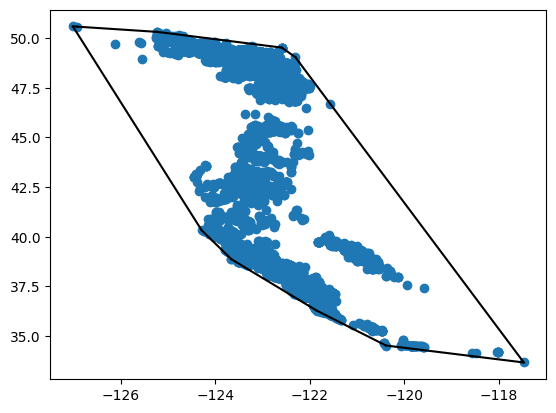

In [32]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [18]:
arbutusMenziesiiObs.head(10)

,species,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation
1,Arbutus menziesii,38.415645,-122.598695,10.0,NaN,NaN
2,Arbutus menziesii,38.018904,-122.657393,21.0,NaN,NaN
3,Arbutus menziesii,43.364802,-124.320687,9.0,NaN,NaN
4,Arbutus menziesii,37.998169,-122.709572,4.0,NaN,NaN
5,Arbutus menziesii,48.516700,-123.581855,2.0,NaN,NaN
6,Arbutus menziesii,40.324895,-124.285147,5.0,NaN,NaN
9,Arbutus menziesii,49.207220,-123.968545,159.0,NaN,NaN
11,Arbutus menziesii,47.620823,-122.755036,10.0,NaN,NaN
12,Arbutus menziesii,37.842638,-122.197263,10.0,NaN,NaN
13,Arbutus menziesii,48.319807,-123.544025,244.0,NaN,NaN


In [21]:
arbutusMenziesiiObs["decimalLongitude"].iloc(0)[1]

-122.657393

In [22]:
menziePts = [[arbutusMenziesiiObs["decimalLongitude"].iloc(0)[i],arbutusMenziesiiObs["decimalLatitude"].iloc(0)[i]] for i in range(len(arbutusMenziesiiObs["decimalLongitude"]))]

In [ ]:
#My first idea for computing a better hull: 

In [23]:
menziePts

[[-122.598695, 38.415645],
 [-122.657393, 38.018904],
 [-124.320687, 43.364802],
 [-122.709572, 37.998169],
 [-123.581855, 48.5167],
 [-124.285147, 40.324895],
 [-123.968545, 49.20722],
 [-122.755036, 47.620823],
 [-122.197263, 37.842638],
 [-123.544025, 48.319807],
 [-122.745541, 45.581704],
 [-122.156808, 37.11555],
 [-123.160928, 44.028395],
 [-123.308128, 48.815017],
 [-122.579231, 38.414772],
 [-122.18595, 37.349847],
 [-122.99145, 42.93233],
 [-122.438943, 38.570514],
 [-122.035286, 37.242591],
 [-122.149972, 37.102431],
 [-123.112114, 44.071877],
 [-123.5457, 42.409675],
 [-122.739039, 45.577038],
 [-122.872393, 45.449706],
 [-122.625249, 37.94759],
 [-124.999053, 50.030678],
 [-123.505593, 48.555137],
 [-123.969667, 49.537827],
 [-123.366897, 48.775322],
 [-123.55227, 48.480983],
 [-123.476157, 48.930352],
 [-123.368133, 48.464092],
 [-122.231453, 47.794976],
 [-123.894409, 49.134446],
 [-122.83293, 45.386288],
 [-121.977419, 37.009041],
 [-122.593178, 38.021183],
 [-123.110388